<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Sprint Challenge*

In [586]:
from sklearn import tree, metrics, naive_bayes, linear_model, ensemble, model_selection, feature_extraction
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import collections
import requests
import gensim
import string
import nltk
import re

In [52]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Natural Language Processing

**Part 1 - Working with Text Data**
Use Python string methods remove irregular whitespace from the following string:

In [8]:
whitespace_string = "\n\n  This is a    string   that has  \n a lot of  extra \n   whitespace.   "
print(whitespace_string)



  This is a    string   that has  
 a lot of  extra 
   whitespace.   


In [33]:
re.sub('\s+', ' ', whitespace_string.replace('\n', ' ')).strip()

'This is a string that has a lot of extra whitespace.'

### Use Regular Expressions to take the dates in the following .txt file and put them into a dataframe with columns for:

[RegEx dates.txt](https://raw.githubusercontent.com/ryanleeallred/datasets/master/dates.txt)

- Day
- Month
- Year


In [14]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/dates.txt'
dates = requests.get(url).text

In [27]:
months, days, years = np.array([re.compile('(\w+)\s(\d+),\s(\d+)').findall(date)[0] for date in dates.split('\r\n')]).T

In [30]:
pd.DataFrame({
    'Day': days,
    'Month': months,
    'Year': years
})

,Day,Month,Year
0,8,March,2015
1,15,March,2015
2,22,March,2015
3,29,March,2015
4,5,April,2015
5,12,April,2015
6,19,April,2015
7,26,April,2015
8,3,May,2015
9,10,May,2015


# Part 2 - Bag of Words 

### Use the twitter sentiment analysis dataset found at this link for the remainder of the Sprint Challenge:

[Twitter Sentiment Analysis Dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/twitter_sentiment_binary.csv)

 ### Clean and tokenize the documents ensuring the following properties of the text:

1) Text should be lowercase.

2) Stopwords should be removed.

3) Punctuation should be removed.

4) Tweets should be tokenized at the word level. 

(The above don't necessarily need to be completed in that specific order.)

### Output some cleaned tweets so that we can see that you made all of the above changes.


In [120]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/twitter_sentiment_binary.csv'
tweets = pd.read_csv(url).rename(columns={'SentimentText': 'text', 'Sentiment': 'sentiment'})

In [121]:
stopwords = nltk.corpus.stopwords.words("english")

In [122]:
tweets["text"] = tweets.text.str.lower()
tweets["text"] = tweets.text.apply(
    lambda tweet: " ".join([
        word for word in nltk.tokenize.word_tokenize(tweet) 
        if word not in stopwords 
        and re.search('[{}]+'.format(string.punctuation), word) == None
    ])
)

In [123]:
tweets.sample(10).text

90550    clunkclunk baaahhhh thanks update kwod first s...
48459    artransmitte good afternoon still grabs good w...
49786    artfulmanager perhaps hopefully worth access i...
16205    lazy eat lunch watch slumdog millionaire yay k...
66828       bmgirl87 blabla mi biggest fan lt 3 see monday
20607    works 8 6 today livelaughsing worst could happ...
39779                              andieness eddie leaving
55220     barbylon montgomery science sphere broken mcwane
38272                 amendurance experience purely random
61899           know must hate home enjoying time families
Name: text, dtype: object

### How should TF-IDF scores be interpreted? How are they calculated?

TF-IDF scores are indications of informational content that each token conveys about a given document<br>
within some set of documents. Below is a construction of the TF-IDF scoring mechanism which illustrates<br>
how informational content is determined:

Consider a set of documents, we represent these as individual strings, as in the cell below

In [677]:
documents = [
    "a a b",
    "b c a",
    "a b b",
    "b c b",
    "c c c",
    "a b c"
]

To determine the _term frequency_ (TF) we would need to count the occurence of each unique<br>
token across every document. Hence the documents `"a b"` and `"b b"` would receive TF counts<br>
of `{'a': 1, 'b': 1}` and `{'b': 2}` respectively.

In [678]:
terms = [word for document in documents for word in document.split(' ')]
unique = set(terms)

Using the `collection` module, this is exactly what's carried out below, as indicated,<br>
across all documents. For the unfamiliar `Counter` returns a dictionary with unique members<br>
of the given `Iterable` as keys, and their frequency within said `Iterable` as values.<br>

In [679]:
tfs = [collections.Counter(document.split(' ')) for document in documents]

In [680]:
documents[0], tfs[0]

('a a b', Counter({'a': 2, 'b': 1}))

To determine the _inverse document frequency_ (IDF) we gather unique tokens across all documents.<br>
Using that set, we determine how many times each one occurs, at all, in a document. Reusing the ealier<br>
example, the documents `"a b"` and `"b b"` would yield a document frequency (df) of `{'a': 1, 'b': 2}`. To<br>
determine the IDF for each we simply need to take it's inverse `1/df`, scale said inverse by the count of<br>
documents `N`, and finally take the logarithm of the whole thing (e.g. via `np.log`).

In [686]:
N = len(documents)
dfs = {term: sum([1 if term in document else 0 for document in documents]) for term in unique}
idfs = {term: np.log(N/df) for term, df in dfs.items()}

In [687]:
idfs

{'c': 0.4054651081081644, 'a': 0.4054651081081644, 'b': 0.1823215567939546}

The resulting TF-IDF score is determined simply by scaled our inverse document frequency<br>
by our term frequency as show below.

In [688]:
tfidfs = [{term: tf[term]*idf for term, idf in idfs.items()} for tf in tfs]

In [689]:
pd.DataFrame(tfidfs)

,a,b,c
0,0.810930,0.182322,0.000000
1,0.405465,0.182322,0.405465
2,0.405465,0.364643,0.000000
3,0.000000,0.364643,0.405465
4,0.000000,0.000000,1.216395
5,0.405465,0.182322,0.405465


Finally, a function which condenses the above construction:

In [664]:
def tfidf(documents):
    terms = [word for document in documents for word in document.split(' ')]
    unique = set(terms)
    
    tfs = [collections.Counter(document.split(' ')) for document in documents]
    
    N = len(documents)
    dfs = [sum([1 if term in document else 0 for document in documents]) for term in unique]
    idfs = [np.log(N/df) for df in dfs]
    
    return pd.DataFrame([{term: tf[term]*idf for term, idf in zip(unique, idfs)} for tf in tfs])

While the above demonstrates _how_ you generate the TF-IDF score, it doesn't shed<br>
much light as to how it should be intrepreted or what it even does. To that end consider<br>
a series of documents that are all identical. We shouldn't expect any of them to<br>
to convey a great deal of novel information.

In [690]:
tfidf(["a a", "a a", "a a"])

,a
0,0.0
1,0.0
2,0.0


As the above demonstrates, no informational content is conveyed when the information is uniform.<br>
What if we add in one chance?

In [691]:
tfidf(["a a", "a b", "a a"])

,a,b
0,0.0,0.000000
1,0.0,1.098612
2,0.0,0.000000


Ah! We can see that all the information got allocate to the one novel thing that occured<br>
the introduction of a `b` token. But consider the following result as well:

In [692]:
tfidf(["a", "b", "a"])

,a,b
0,0.405465,0.000000
1,0.000000,1.098612
2,0.405465,0.000000


Here we can see that TF-IDF considers the `a` tokens to be novel under this construction.<br>
This is illustrating the use of having an IDF term in our calculation, when a token occurs in<br>
every document, it's IDF calculation is `np.log(N/N)` where `N` is the number of documents<br>
obviously this simplified to `np.log(1)`, which as you can see below, is `0`.

In [694]:
np.log(1)

0.0

What's to be concluded is that TF-IDF conveys information about how surprised we<br>
should be that each term has occured. In the case where the terms are uniform,<br>
there isn't much to be surprised about, but if the terms vary, then mild surpise<br>
is in order.

# Part 3 - Document Classification

1) Use Train_Test_Split to create train and test datasets.

2) Vectorize the tokenized documents using your choice of vectorization method. 

 - Stretch goal: Use both of the methods that we talked about in class.

3) Create a vocabulary using the X_train dataset and transform both your X_train and X_test data using that vocabulary.

4) Use your choice of binary classification algorithm to train and evaluate your model's accuracy. Report both train and test accuracies.

 - Stretch goal: Use an error metric other than accuracy and implement/evaluate multiple classifiers.
 - Stretch goal: Track your results in a DataFrmae and produce a visualization of the results

In [124]:
X = tweets.text
y = tweets.sentiment

In [231]:
y.value_counts(normalize=True)

1    0.564632
0    0.435368
Name: sentiment, dtype: float64

In [232]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

#### TF-IDF Vectorizer

In [514]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(4,1))
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(4, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [515]:
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [526]:
classifier = linear_model.LogisticRegression(n_jobs=-1, solver='saga')

In [527]:
classifier.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [528]:
metrics.f1_score(y_test, classifier.predict(X_test_vectorized))

0.7878397177077324

In [529]:
metrics.f1_score(y_train, classifier.predict(X_train_vectorized))

0.8598403473462835

In [530]:
metrics.roc_auc_score(y_test, classifier.predict(X_test_vectorized))

0.7390200593044769

In [531]:
metrics.roc_auc_score(y_train, classifier.predict(X_train_vectorized))

0.8253909975652334

In [535]:
scores = pd.DataFrame(model_selection.cross_validate(classifier, vectorizer.transform(X), y, scoring="f1", cv=10, n_jobs=-1))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(0, 1)

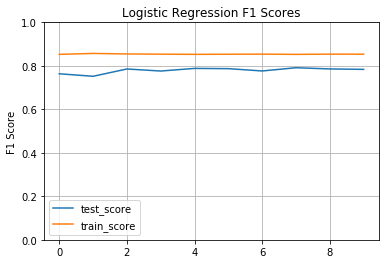

In [541]:
scores[["test_score", "train_score"]].plot.line(grid=True)

plt.title("Logistic Regression F1 Scores")
plt.ylabel("F1 Score");

plt.ylim(0, 1)

#### Count Vectorizer

In [544]:
vectorizer = feature_extraction.text.CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [545]:
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [546]:
classifier = naive_bayes.MultinomialNB()

In [547]:
classifier.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [548]:
metrics.f1_score(y_test, classifier.predict(X_test_vectorized))

0.7779970228822654

In [549]:
metrics.f1_score(y_train, classifier.predict(X_train_vectorized))

0.8940076042079728

In [550]:
metrics.roc_auc_score(y_test, classifier.predict(X_test_vectorized))

0.7354298503705867

In [551]:
metrics.roc_auc_score(y_train, classifier.predict(X_train_vectorized))

0.875103505231242

In [554]:
scores = pd.DataFrame(model_selection.cross_validate(classifier, vectorizer.transform(X), y, scoring="f1", cv=10))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [555]:
scores

,fit_time,score_time,test_score,train_score
0,0.039621,0.004185,0.724298,0.879314
1,0.038467,0.004118,0.720567,0.879896
2,0.037660,0.004006,0.724964,0.878731
3,0.035791,0.004224,0.737148,0.877222
4,0.037830,0.004122,0.758711,0.876989
5,0.037674,0.004322,0.740457,0.877556
6,0.040014,0.004263,0.742862,0.876766
7,0.035651,0.004143,0.761563,0.876239
8,0.036787,0.004151,0.759982,0.876880
9,0.036246,0.004214,0.766904,0.876520


(0, 1)

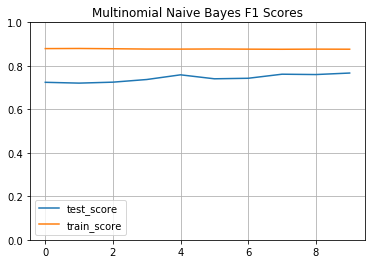

In [556]:
scores[["test_score", "train_score"]].plot.line(grid=True)

plt.title("Multinomial Naive Bayes F1 Scores")
plt.ylabel("")

plt.ylim(0, 1)

# Part 4 -  Word2Vec

1) Fit a Word2Vec model on your cleaned/tokenized twitter dataset. 

2) Display the 10 words that are most similar to the word "twitter"

In [362]:
model = gensim.models.Word2Vec(tweets.text.str.split(" "), size=40, window=10)

In [571]:
similar_words = pd.DataFrame(model.wv.most_similar("twitter", topn=10), columns=["word", "score"])

In [572]:
similar_words

,word,score
0,email,0.869036
1,facebook,0.861772
2,dm,0.856658
3,sent,0.849771
4,following,0.834294
5,link,0.831012
6,message,0.827085
7,list,0.821283
8,page,0.814559
9,account,0.813298


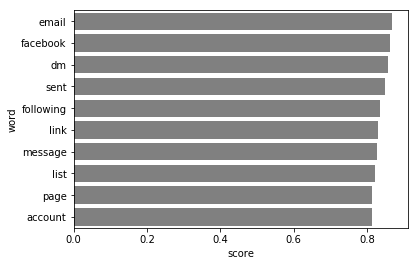

In [578]:
sns.barplot(
    x=similar_words.score,
    y=similar_words.word,
    color='grey'
)